In [1]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [2]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
train_df.shape

(8693, 14)

In [5]:
test_df.shape

(4277, 13)

In [6]:
train_df.isnull().sum().sum()

2324

In [7]:
test_df.isnull().sum().sum()

1117

In [8]:
X = train_df.iloc[:,:-1]
y = train_df.iloc[:,-1]

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

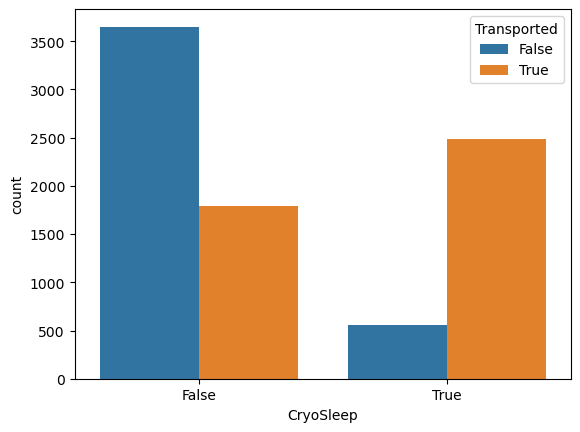

In [11]:
sns.countplot(x = 'CryoSleep', hue = "Transported", data=train_df)
plt.show()

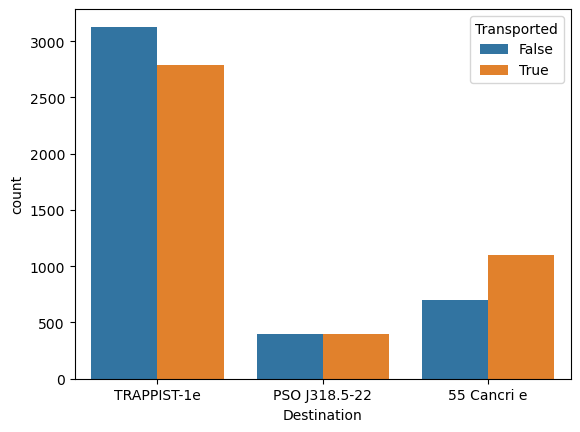

In [12]:
sns.countplot(x = 'Destination', hue = "Transported", data=train_df)
plt.show()

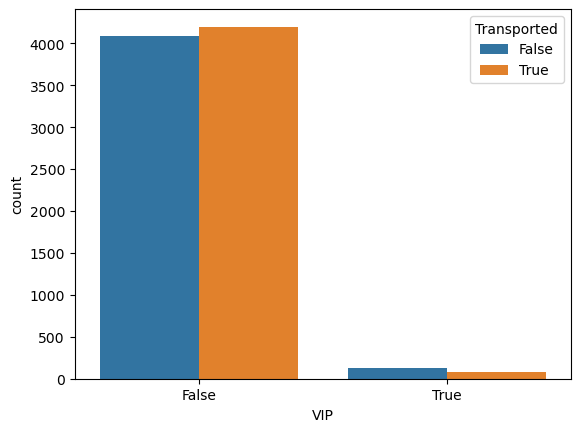

In [13]:
sns.countplot(x = 'VIP', hue = "Transported", data=train_df)
plt.show()

In [14]:
X = X.drop("VIP", axis=1)
test_df = test_df.drop("VIP", axis=1)

In [15]:
class_mapping = {True: 1, False: 0}
y = y.map(class_mapping)
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [16]:
X.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
dtype: object

In [17]:
ohe_columns = ["PassengerId", "HomePlanet", "CryoSleep", "Cabin", "Destination", "Name"]
X = pd.get_dummies(X, dummy_na=True, columns = ohe_columns)
X.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_0001_01,PassengerId_0002_01,PassengerId_0003_01,PassengerId_0003_02,...,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Flesping,Name_Zubeneb Pasharne,Name_nan
0,39.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,24.0,109.0,9.0,25.0,549.0,44.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,16.0,303.0,70.0,151.0,565.0,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
X.shape

(8693, 23746)

In [19]:
from sklearn.impute import SimpleImputer

# インピュータークラスのインスタンス化と（列平均の）学習
imp = SimpleImputer()
imp.fit(X) # 何列目の平均値がhogehogeだよと学習(fit)している

# 学習済みImputerの適用：各列の欠損値の置換
X_new = pd.DataFrame(imp.transform(X), columns=X.columns)

# 結果表示
print('この時点の欠損値の個数：',X_new.isnull().sum().sum())
display(X_new.head())

この時点の欠損値の個数： 0


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_0001_01,PassengerId_0002_01,PassengerId_0003_01,PassengerId_0003_02,...,Name_Zinor Axlentindy,Name_Zinor Proorbeng,Name_Zinoth Lansuffle,Name_Zosmark Trattle,Name_Zosmark Unaasor,Name_Zosmas Ineedeve,Name_Zosmas Mormonized,Name_Zubeneb Flesping,Name_Zubeneb Pasharne,Name_nan
0,39.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
test_ohe_columns = ["PassengerId", "HomePlanet", "CryoSleep", "Cabin", "Destination", "Name"]
test_ohe = pd.get_dummies(test_df, dummy_na=True, columns = test_ohe_columns)
test_ohe.shape

(4277, 11738)

In [21]:
# インピュータークラスのインスタンス化と（列平均の）学習
imp2 = SimpleImputer()
imp2.fit(test_ohe) # 何列目の平均値がhogehogeだよと学習(fit)している

# 学習済みImputerの適用：各列の欠損値の置換
test_new = pd.DataFrame(imp2.transform(test_ohe), columns=test_ohe.columns)

# 結果表示
print('この時点の欠損値の個数：',test_new.isnull().sum().sum())
display(test_new.head())

この時点の欠損値の個数： 0


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,PassengerId_0013_01,PassengerId_0018_01,PassengerId_0019_01,PassengerId_0021_01,...,Name_Zinon Ativeezy,Name_Zinon Nairconed,Name_Zinoth Pokerheed,Name_Zosmar Asolipery,Name_Zosmar Inkcablel,Name_Zosmas Reswiress,Name_Zubeneb Camaxler,Name_Zubens Blentrary,Name_Zubens Peterive,Name_nan
0,27.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,19.0,0.0,9.0,0.0,2823.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,38.0,0.0,6652.0,0.0,181.0,585.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20.0,10.0,0.0,635.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

In [23]:
mo = RandomForestClassifier()
rfe = RFE(mo, n_features_to_select=12, step=0.05)
selected_features = rfe.fit_transform(X_new, y)
selected_feature_names = X_new.columns[rfe.support_]
print("Selected features:", selected_feature_names)

Selected features: Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'CryoSleep_False', 'CryoSleep_True', 'Destination_TRAPPIST-1e'],
      dtype='object')


In [24]:
X = pd.DataFrame(X_new, columns = selected_feature_names)
test_new = pd.DataFrame(test_new, columns = selected_feature_names)


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [26]:
from sklearn.model_selection import GridSearchCV
param_grid_logistic = {
    'n_estimators':[50, 100, 150, 200],
    'max_depth':[3, 5, 7, 9]
}

pre_model = GradientBoostingClassifier(random_state=123)
gs1 = GridSearchCV(
          estimator=pre_model,
          param_grid=param_grid_logistic,
          scoring='f1', #auc, f1
          cv=3,
          return_train_score=False)
gs1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=123),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [27]:
gs1.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [28]:
pre_model = RandomForestClassifier(random_state=123)
gs2 = GridSearchCV(
          estimator=pre_model,
          param_grid=param_grid_logistic,
          scoring='f1', #auc, f1
          cv=3,
          return_train_score=False)
gs2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [29]:
gs2.best_params_

{'max_depth': 9, 'n_estimators': 200}

In [30]:
pipelines = {
    
    "rfc add param" : RandomForestClassifier(max_depth = 9, n_estimators = 200, random_state = 123),
    
    
    "gbc add param" : GradientBoostingClassifier(max_depth = 3, n_estimators = 100, random_state = 123),
    
    
    "rfc" : RandomForestClassifier(random_state = 123),
    
    
    "gbc" : GradientBoostingClassifier(random_state = 123)
}

In [31]:
for model_name, instance in pipelines.items():
    instance.fit(X_train, y_train)
    print("-----------------------------------")
    print(model_name)
    print("-----------------------------------")
    print(f"accuracy_score (train): {accuracy_score(y_train, instance.predict(X_train))}")
    print(f"accuracy_score (test): {accuracy_score(y_test, instance.predict(X_test))}")
    print(f"recall_score : {recall_score(y_test, instance.predict(X_test))}")
    print(f"precision_score : {precision_score(y_test, instance.predict(X_test))}")
    print(f"f1_score : {f1_score(y_test, instance.predict(X_test))}")

-----------------------------------
rfc add param
-----------------------------------
accuracy_score (train): 0.8354971240755957
accuracy_score (test): 0.8040644171779141
recall_score : 0.8291571753986332
precision_score : 0.7924528301886793
f1_score : 0.8103896103896104
-----------------------------------
gbc add param
-----------------------------------
accuracy_score (train): 0.809695973705834
accuracy_score (test): 0.8044478527607362
recall_score : 0.8466211085801063
precision_score : 0.7835558678847505
f1_score : 0.8138686131386861
-----------------------------------
rfc
-----------------------------------
accuracy_score (train): 0.9410024650780608
accuracy_score (test): 0.7891104294478528
recall_score : 0.7760060744115413
precision_score : 0.8003132341425215
f1_score : 0.7879722436391673
-----------------------------------
gbc
-----------------------------------
accuracy_score (train): 0.809695973705834
accuracy_score (test): 0.8044478527607362
recall_score : 0.8466211085801063
p

In [32]:
true_model = GradientBoostingClassifier(random_state = 123)
true_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=123)

In [33]:
imp = true_model.feature_importances_

In [34]:
imp = pd.Series(imp, index=X.columns)
imp

Age                        0.031266
RoomService                0.111659
FoodCourt                  0.087572
ShoppingMall               0.033991
Spa                        0.135041
VRDeck                     0.109454
HomePlanet_Earth           0.074048
HomePlanet_Europa          0.018037
HomePlanet_Mars            0.001674
CryoSleep_False            0.033388
CryoSleep_True             0.358531
Destination_TRAPPIST-1e    0.005339
dtype: float64

Age                        0.031266
RoomService                0.111659
FoodCourt                  0.087572
ShoppingMall               0.033991
Spa                        0.135041
VRDeck                     0.109454
HomePlanet_Earth           0.074048
HomePlanet_Europa          0.018037
HomePlanet_Mars            0.001674
CryoSleep_False            0.033388
CryoSleep_True             0.358531
Destination_TRAPPIST-1e    0.005339
dtype: float64

<Axes: >

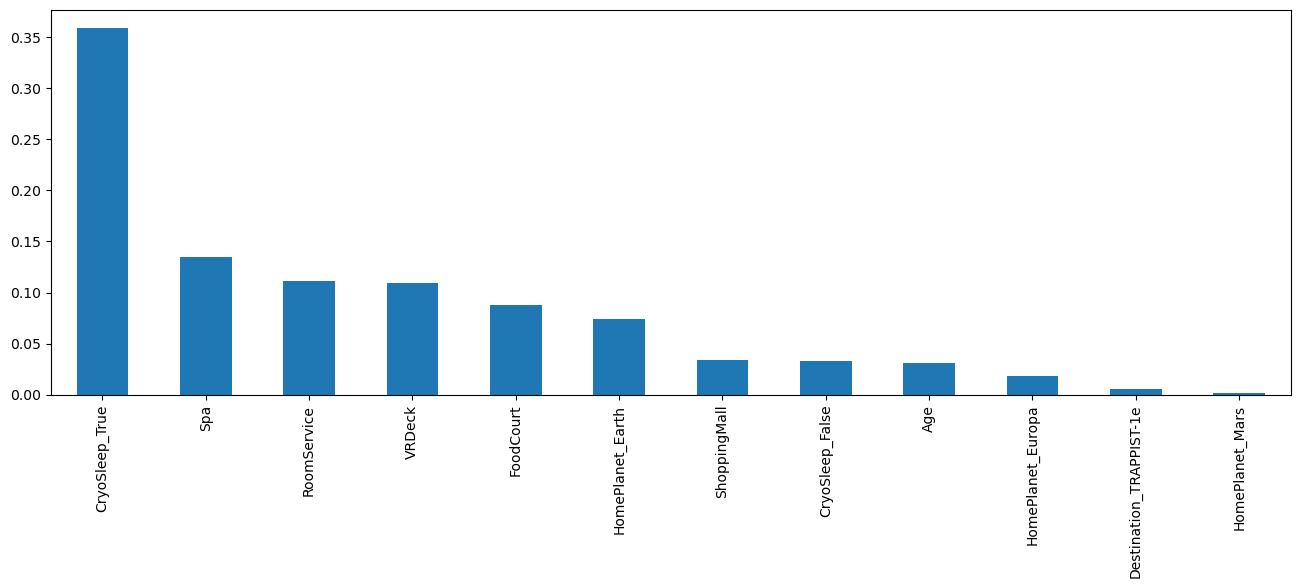

In [35]:
display(imp)
imp.sort_values(ascending=False).plot(kind='bar', figsize=(16,5))

In [36]:
import pickle

In [37]:
# 学習済みモデルを保存
model_comp = true_model# ここに学習済みモデルを代入
with open('titanic.pickle', 'wb') as f:
    pickle.dump(model_comp, f)
    
passenger_ids = test_df['PassengerId']  # passenger_id列を取得

In [38]:
import joblib
# 学習済みモデルを読み込む
loaded_model = joblib.load('titanic.pickle')

# 予測を実行
predictions = loaded_model.predict(test_new)


In [39]:
# データフレームを作成
result_df = pd.DataFrame({'PassengerId': passenger_ids, 'Transported': predictions})

# CSVファイルに保存
result_df.to_csv('Titanic.csv', index=False)

In [40]:
comp = pd.read_csv("Titanic.csv")

In [41]:
comp.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [42]:
class_mapping = {1: True, 0: False}
X = comp.iloc[:,:-1]
y = comp.iloc[:,-1]

In [43]:
y = y.map(class_mapping)

In [44]:
y

0        True
1       False
2        True
3        True
4        True
        ...  
4272     True
4273    False
4274     True
4275     True
4276     True
Name: Transported, Length: 4277, dtype: bool

In [45]:
# Xとyを結合
combined_df = pd.concat([X, y], axis=1)

In [46]:
combined_df

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


In [47]:
combined_df.to_csv('improve_Titanic.csv', index=False)